In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import warnings
warnings.filterwarnings('ignore')

df = pd.read_csv('Datasets/Manipulated-Cybersecurity-Breaches-Dataset.csv')
df

,Name_of_Covered_Entity,State,Business_Associate_Involved,Individuals_Affected,Type_of_Breach,Location_of_Breached_Information
0,Brooke Army Medical Center,TX,NaN,1000,Theft,Paper
1,"Mid America Kidney Stone Association, LLC",MO,NaN,1000,Theft,Network Server
2,Alaska Department of Health and Social Services,AK,NaN,501,Theft,"Other Portable Electronic Device, Other"
3,Health Services for Children with Special Need...,DC,NaN,3800,Loss,Laptop
4,"L. Douglas Carlson, M.D.",CA,NaN,5257,Theft,Desktop Computer
...,...,...,...,...,...,...
1050,Puerto Rico Health Insurance,PR,American Health Inc,28413,Theft,Other
1051,"Hospitalists of Brandon, LLC",FL,"Doctors First Choice Billings, Inc.",1831,Hacking/IT Incident,Other
1052,Santa Rosa Memorial Hospital,CA,NaN,33702,"Theft, Loss",Other Portable Electronic Device
1053,Group Health Plan of Hurley Medical Center,MI,NaN,2289,Unauthorized Access/Disclosure,E-mail


In [2]:
df.shape
# Dataset has 1055 rows and 6 columns

(1055, 6)

In [3]:
# How are we able to differentiate between continous and categorical columns
df.nunique()

Name_of_Covered_Entity              967
State                                52
Business_Associate_Involved         231
Individuals_Affected                809
Type_of_Breach                       29
Location_of_Breached_Information     41
dtype: int64

In [4]:
df.isnull().sum()

Name_of_Covered_Entity                0
State                                 0
Business_Associate_Involved         784
Individuals_Affected                  0
Type_of_Breach                        0
Location_of_Breached_Information      0
dtype: int64

In [5]:
# This cell will focus specifically on the business Associate Involved column
df['Business_Associate_Involved'] = df['Business_Associate_Involved'].replace(np.nan, 'No')
businessAssociate = df.loc[:, 'Business_Associate_Involved']
# print(str(businessAssociate.values))
counter = 0
for i in range(0, len(businessAssociate.values)):
    if businessAssociate[i] != 'No':
        businessAssociate[i] = 'Yes'

In [6]:
df.isnull().sum()
# There is no null value at this point
df.skew()
df.describe()

,Individuals_Affected
count,1.055000e+03
mean,3.026202e+04
std,2.278598e+05
min,5.000000e+02
25%,1.000000e+03
50%,2.300000e+03
75%,6.941000e+03
max,4.900000e+06


## Univariate Analysis

No     784
Yes    271
Name: Business_Associate_Involved, dtype: int64

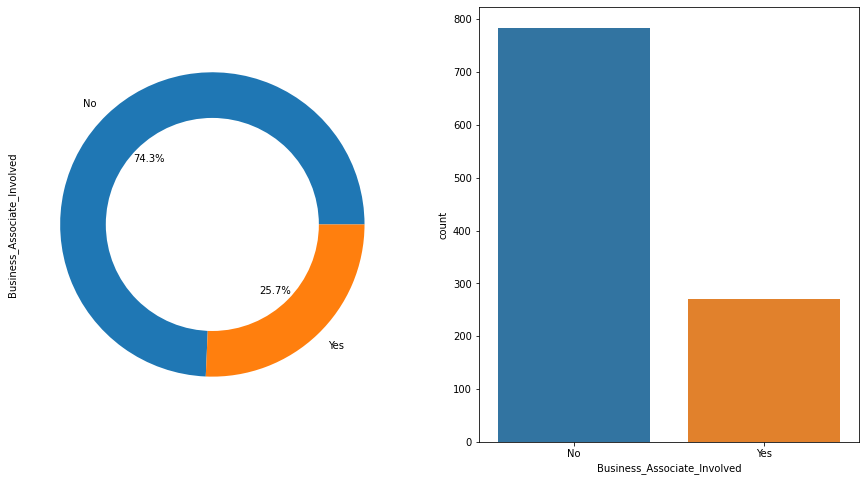

In [7]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['Business_Associate_Involved'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Business_Associate_Involved',data=df)
df['Business_Associate_Involved'].value_counts()

CA    113
TX     83
FL     66
NY     58
IL     49
IN     40
PA     40
OH     33
NC     32
TN     32
MA     32
PR     31
GA     30
MI     26
KY     26
WA     25
MO     25
AZ     21
MN     21
NJ     20
VA     18
MD     18
CO     18
CT     17
OR     15
WI     14
SC     13
AL     12
AR     11
NM     10
UT      9
NE      9
DC      9
IA      8
LA      7
RI      7
KS      7
OK      6
NV      5
MS      5
AK      5
WV      5
NH      4
MT      4
WY      4
ND      3
DE      3
ID      2
HI      1
SD      1
VT      1
ME      1
Name: State, dtype: int64

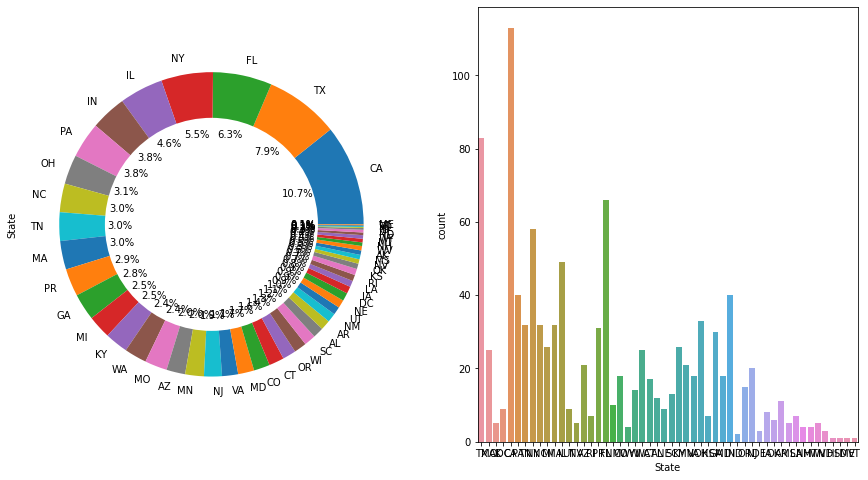

In [8]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
df['State'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='State',data=df)
df['State'].value_counts()

Theft                                                         516
Unauthorized Access/Disclosure                                148
Other                                                          91
Loss                                                           85
Hacking/IT Incident                                            75
Improper Disposal                                              38
Theft, Unauthorized Access/Disclosure                          26
Theft, Loss                                                    15
Unknown                                                        10
Unauthorized Access/Disclosure, Hacking/IT Incident             9
Unauthorized Access/Disclosure, Other                           8
Theft, Other                                                    5
Loss, Unauthorized Access/Disclosure                            5
Theft, Unauthorized Access/Disclosure, Hacking/IT Incident      3
Loss, Improper Disposal                                         3
Loss, Othe

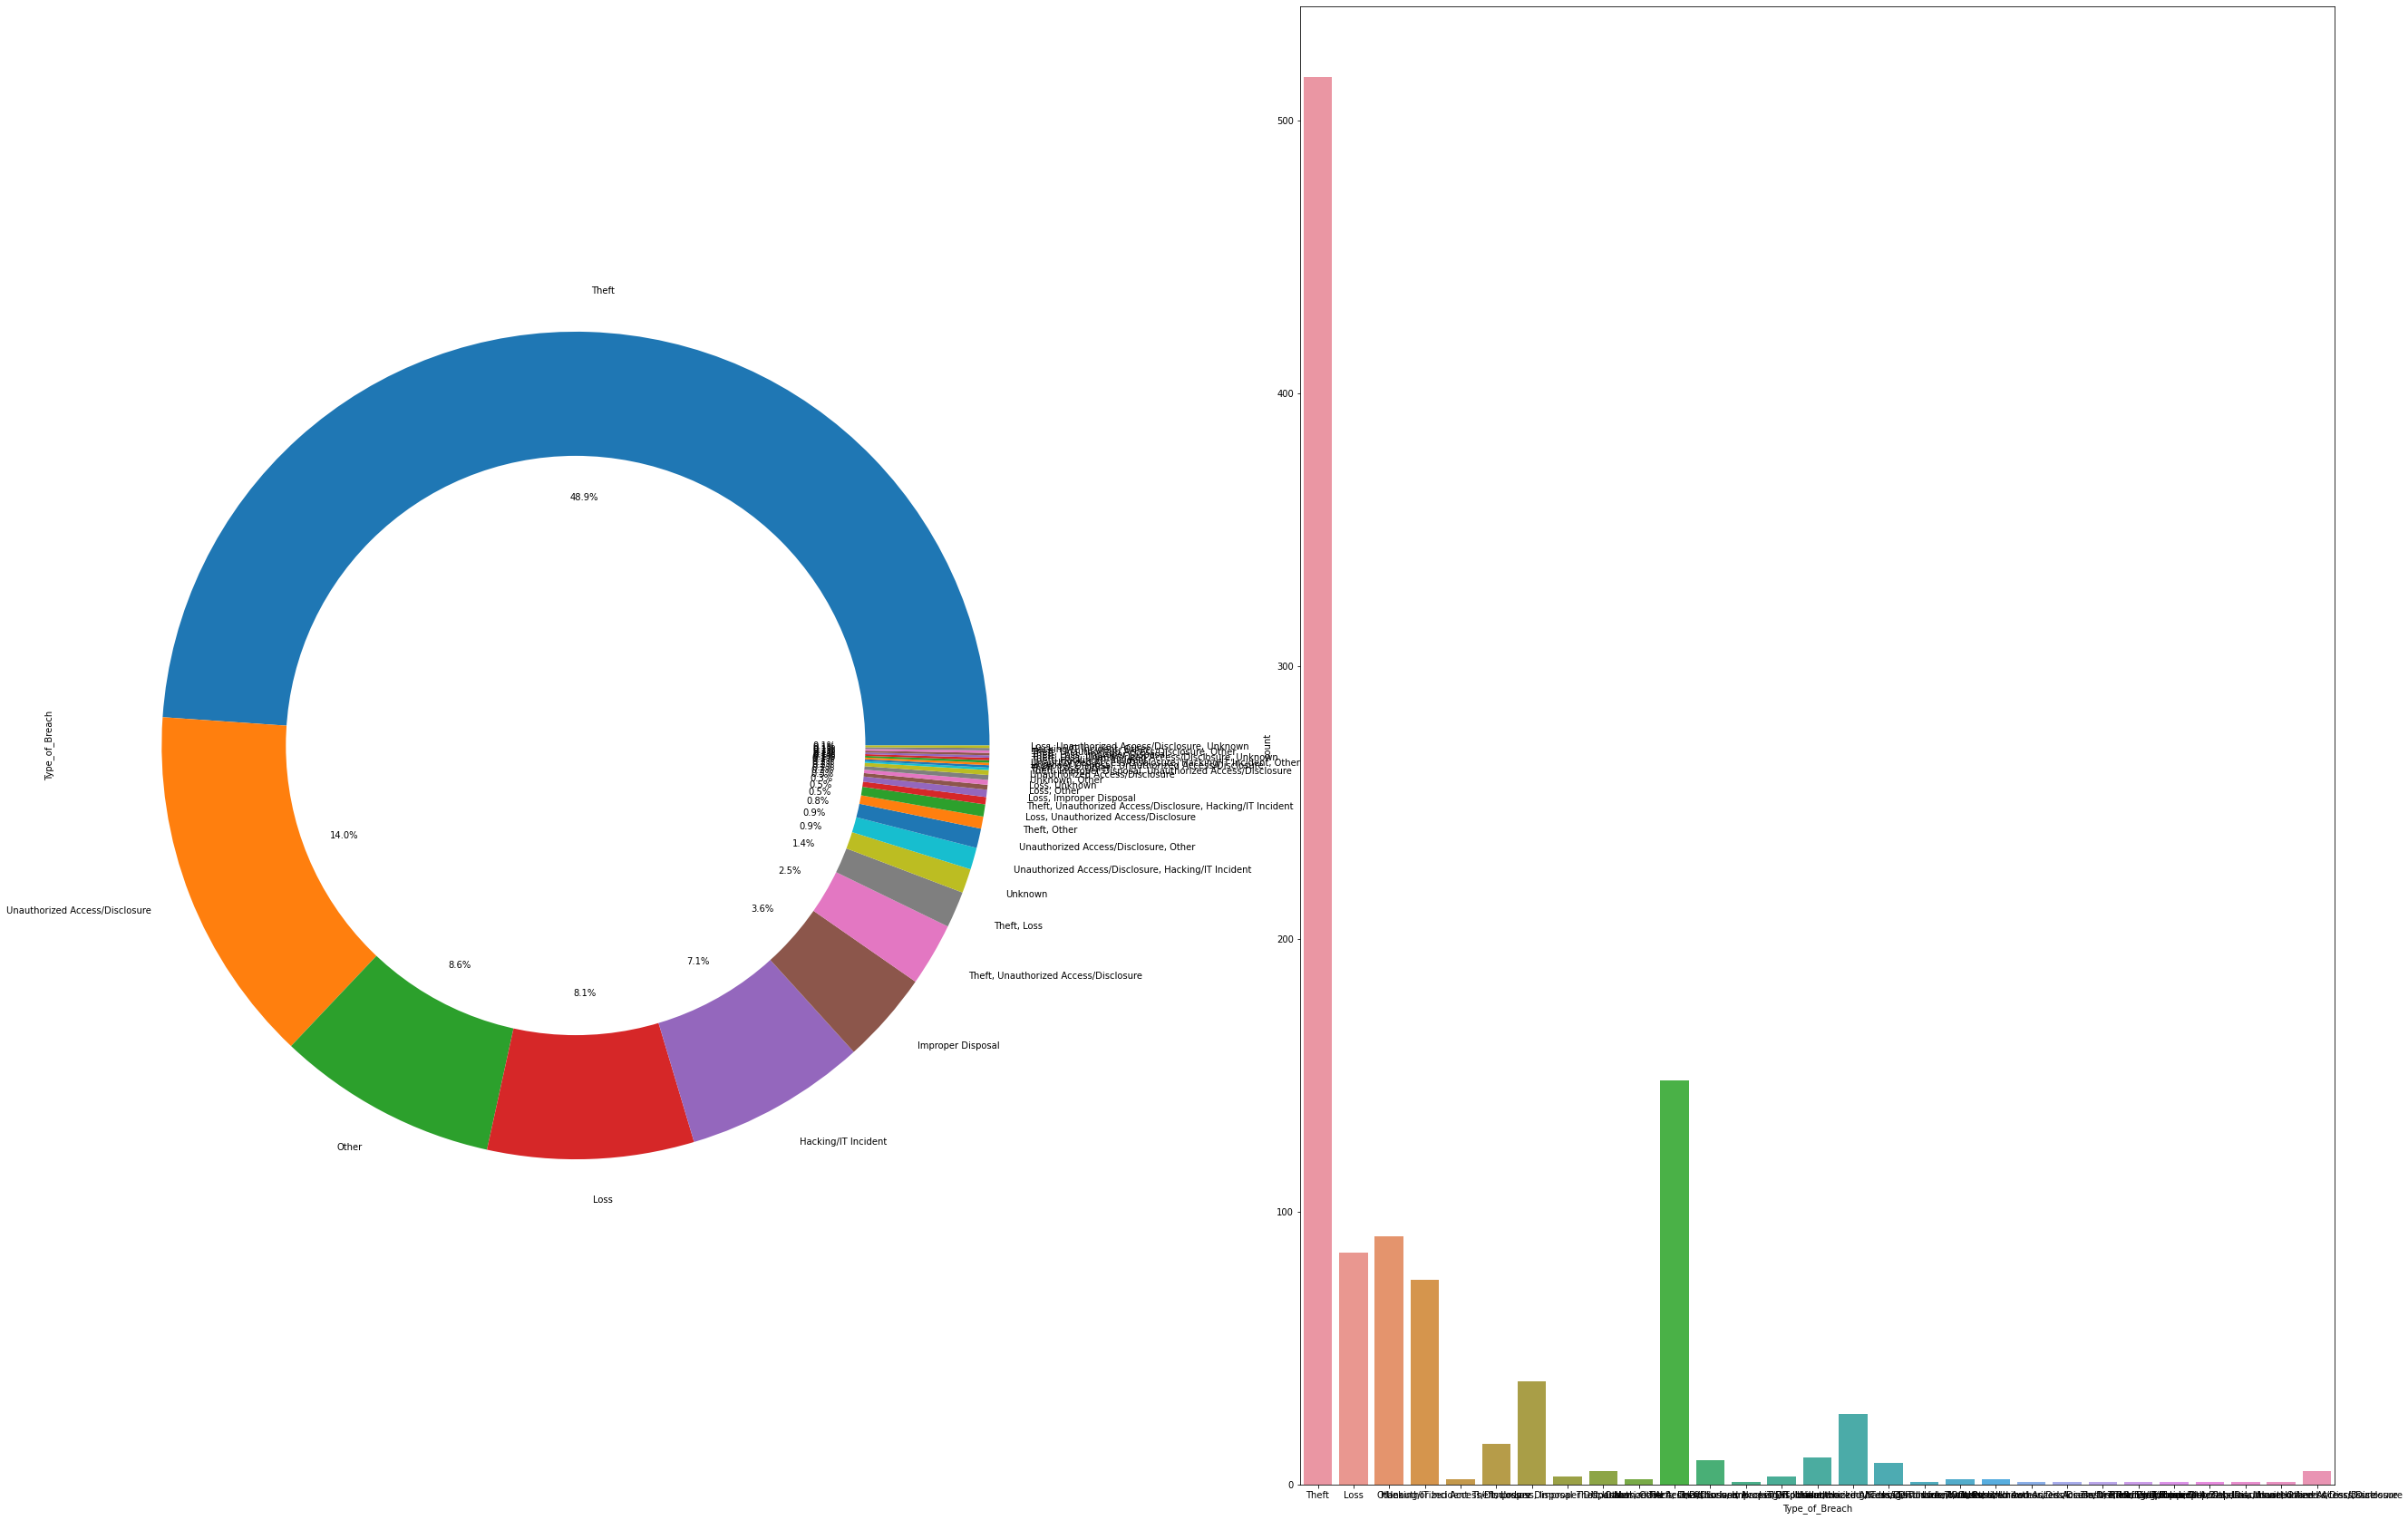

In [9]:
plt.figure(figsize=(45,30))
plt.subplot(1,2,1)
df['Type_of_Breach'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Type_of_Breach',data=df)
df['Type_of_Breach'].value_counts()

Paper                                                                                                                          227
Laptop                                                                                                                         217
Other                                                                                                                          116
Desktop Computer                                                                                                               113
Network Server                                                                                                                 107
Other Portable Electronic Device                                                                                                60
E-mail                                                                                                                          54
Other Portable Electronic Device, Other                                            

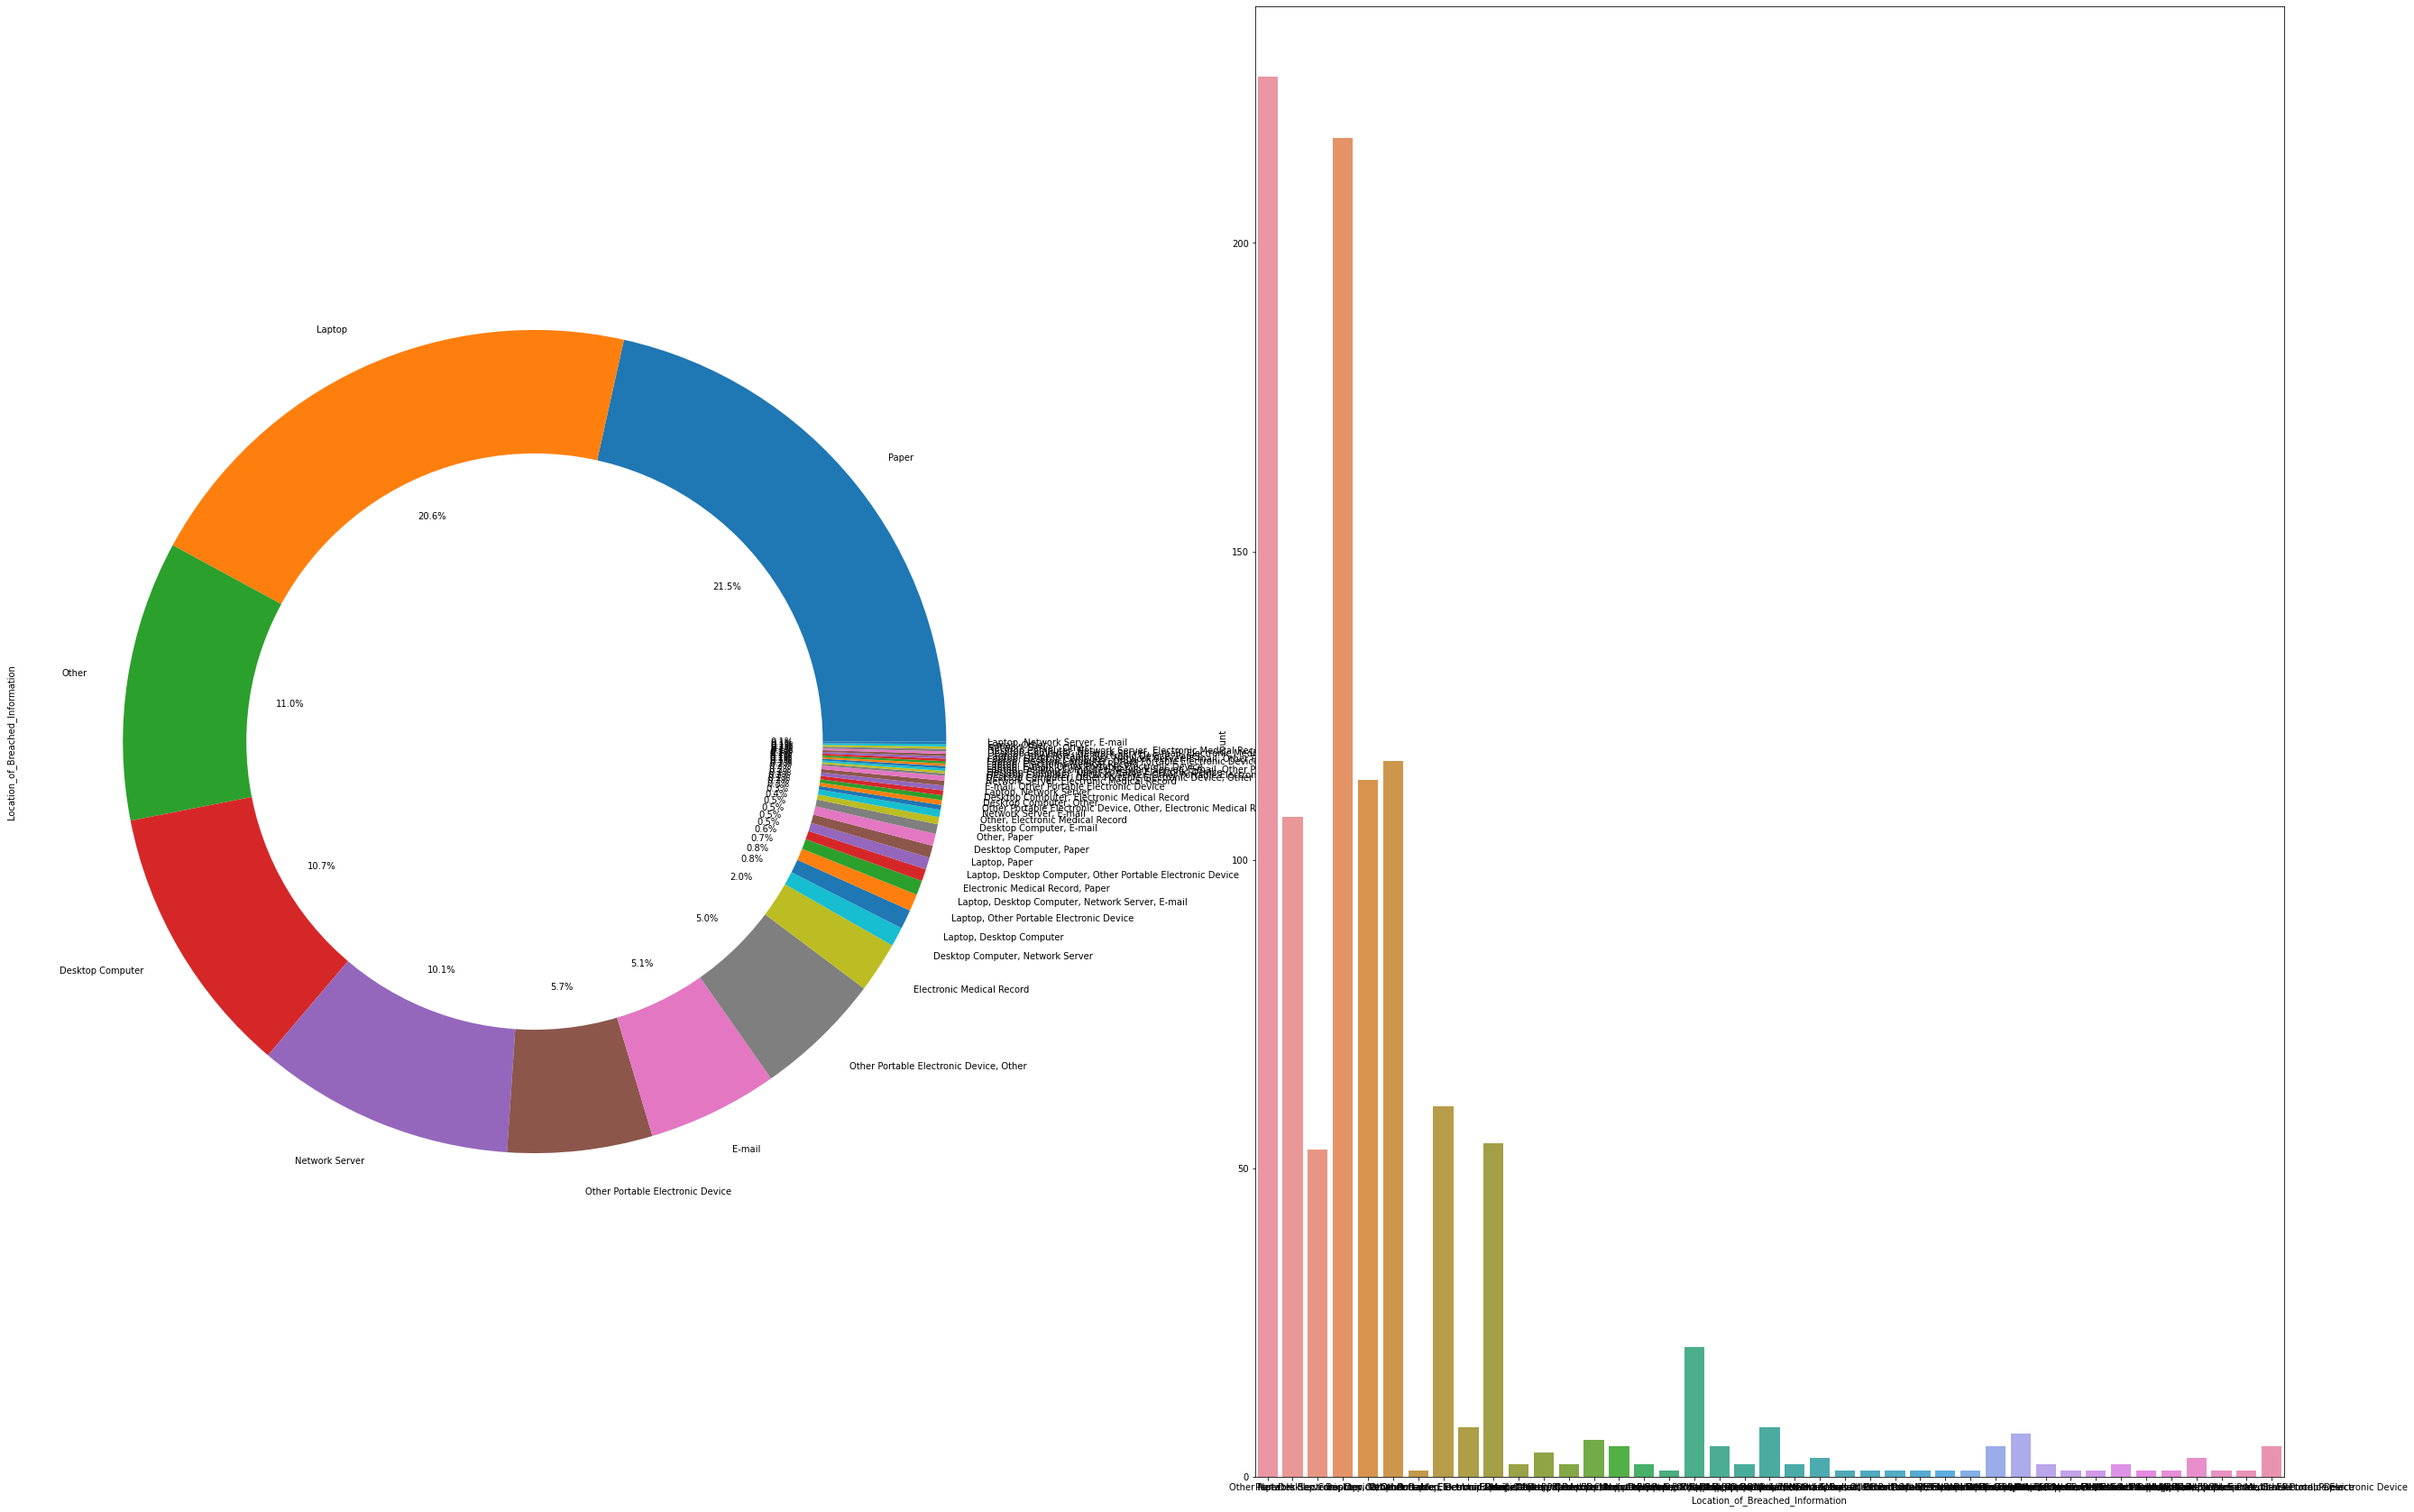

In [10]:
plt.figure(figsize=(45,30))
plt.subplot(1,2,1)
df['Location_of_Breached_Information'].value_counts().plot.pie(autopct='%1.1f%%')
centre=plt.Circle((0,0),0.7,fc='white')
fig=plt.gcf()
fig.gca().add_artist(centre)
plt.subplot(1,2,2)
sns.countplot(x='Location_of_Breached_Information',data=df)
df['Location_of_Breached_Information'].value_counts()

## Bivariate Analysis

<AxesSubplot:xlabel='Type_of_Breach', ylabel='count'>

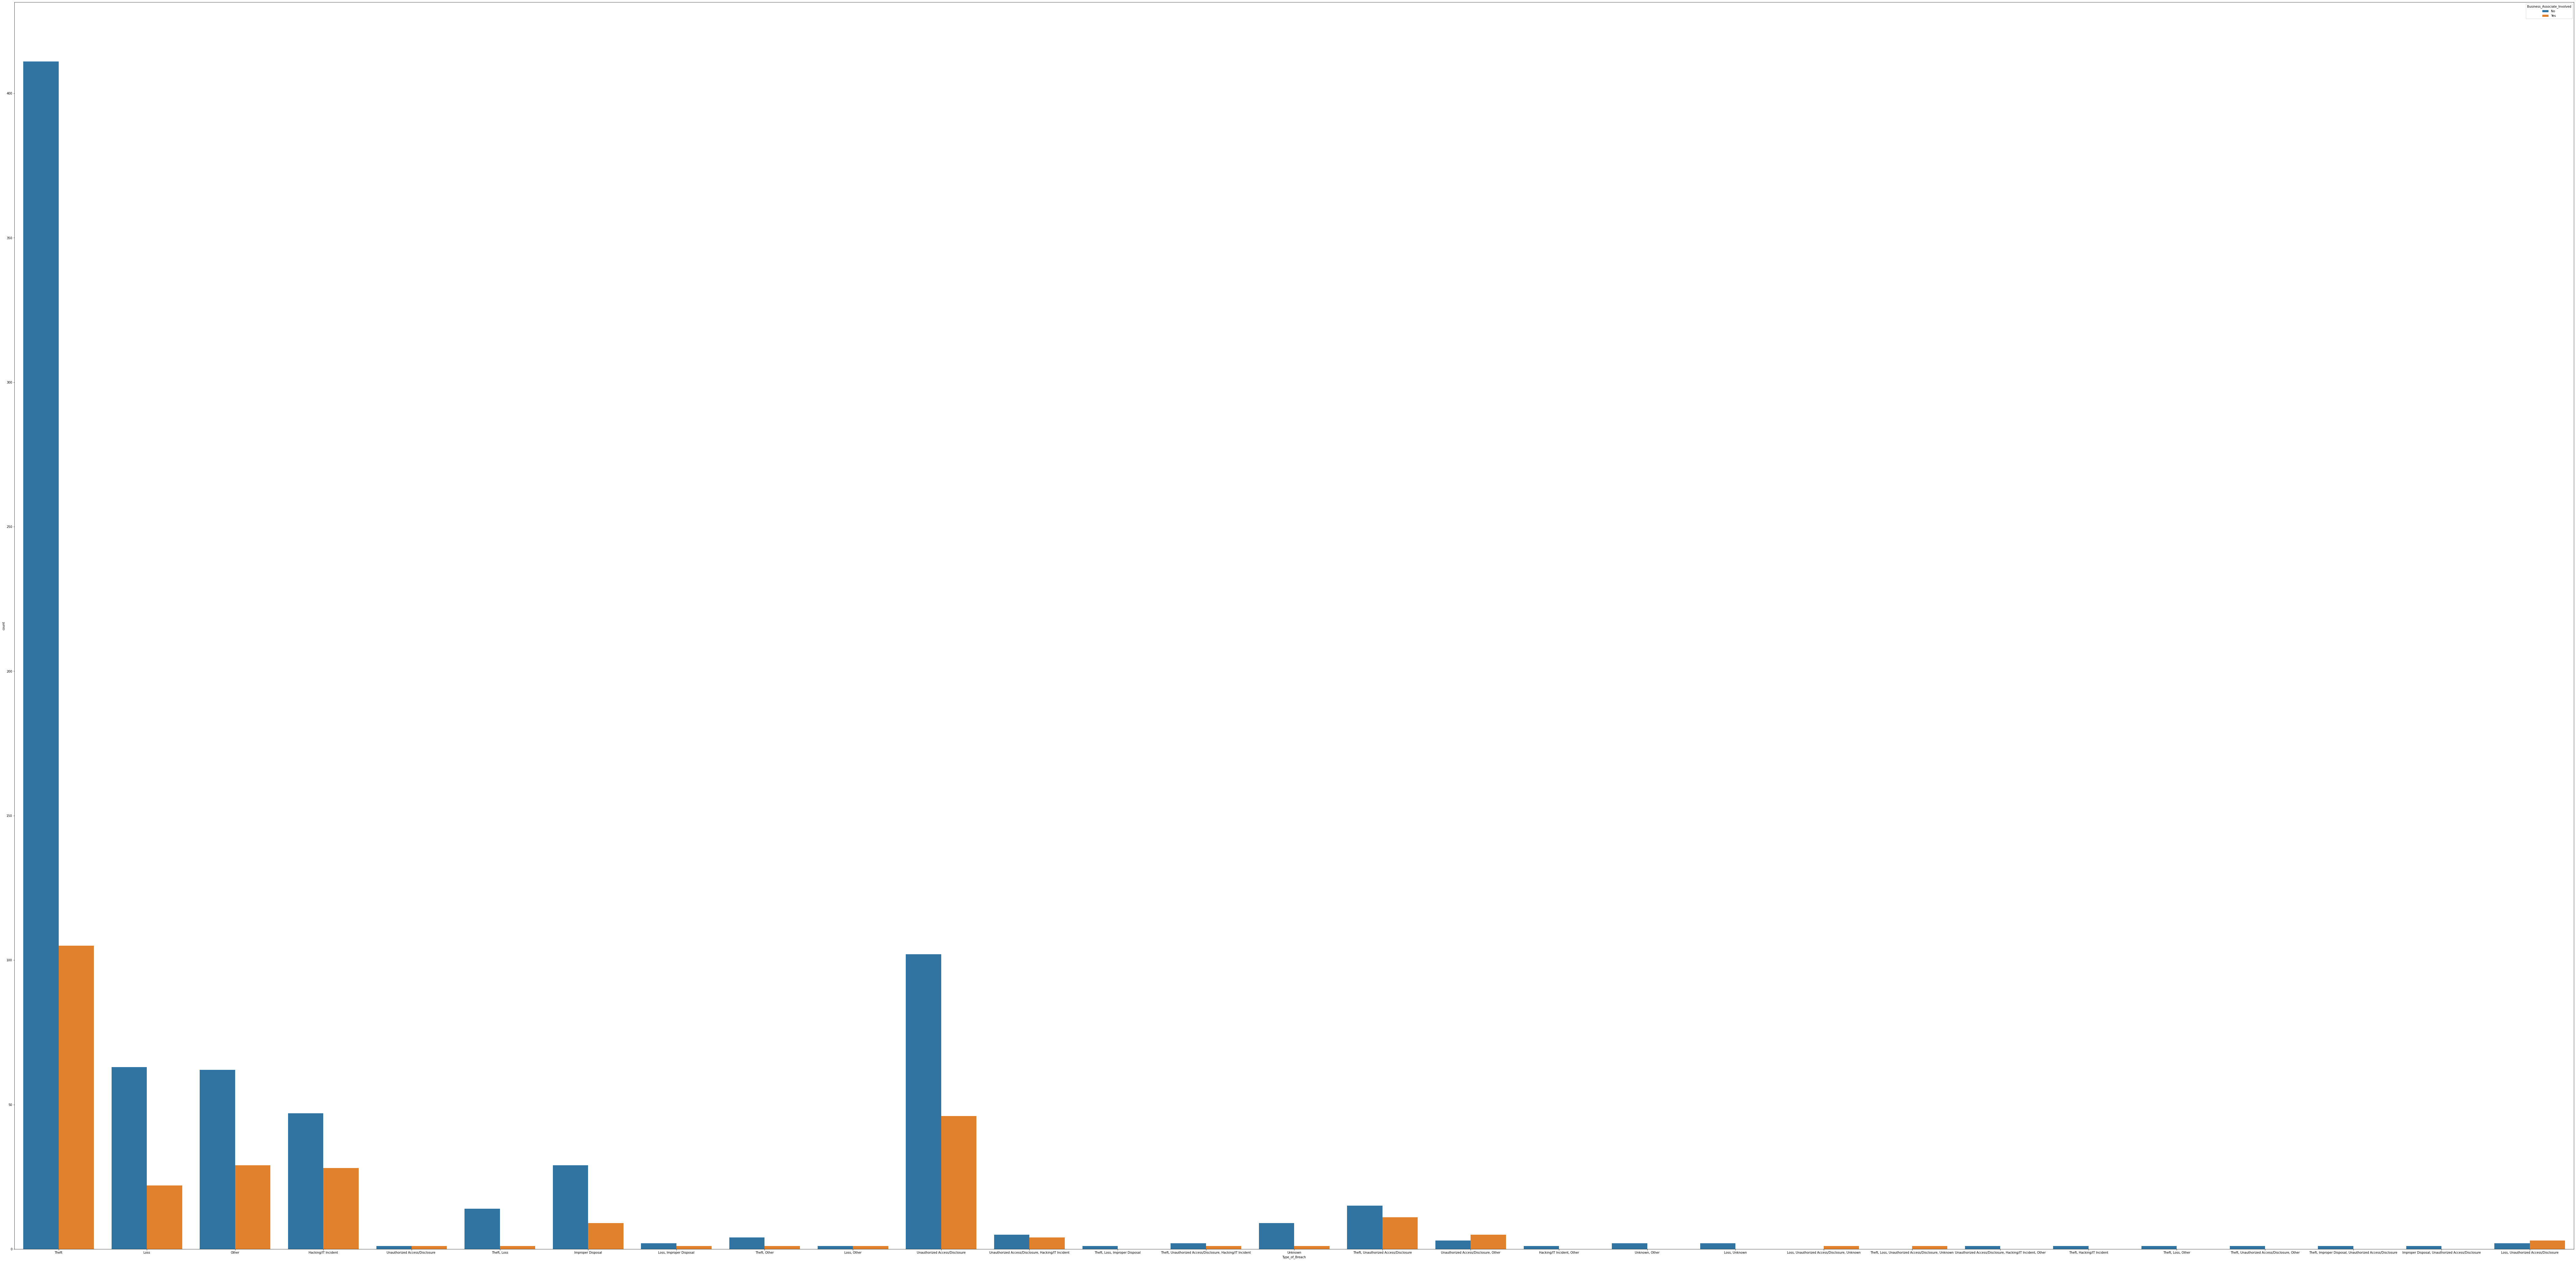

In [11]:
plt.figure(figsize=(150,75))
sns.countplot(df['Type_of_Breach'],hue=df['Business_Associate_Involved'])

In [12]:
plt.figure(figsize=(250,75))
sns.countplot(df['Location_of_Breached_Information'],hue=df['Business_Associate_Involved'])

<AxesSubplot:xlabel='Location_of_Breached_Information', ylabel='count'>

## Multivariate Analysis

<AxesSubplot:xlabel='Type_of_Breach', ylabel='Location_of_Breached_Information'>

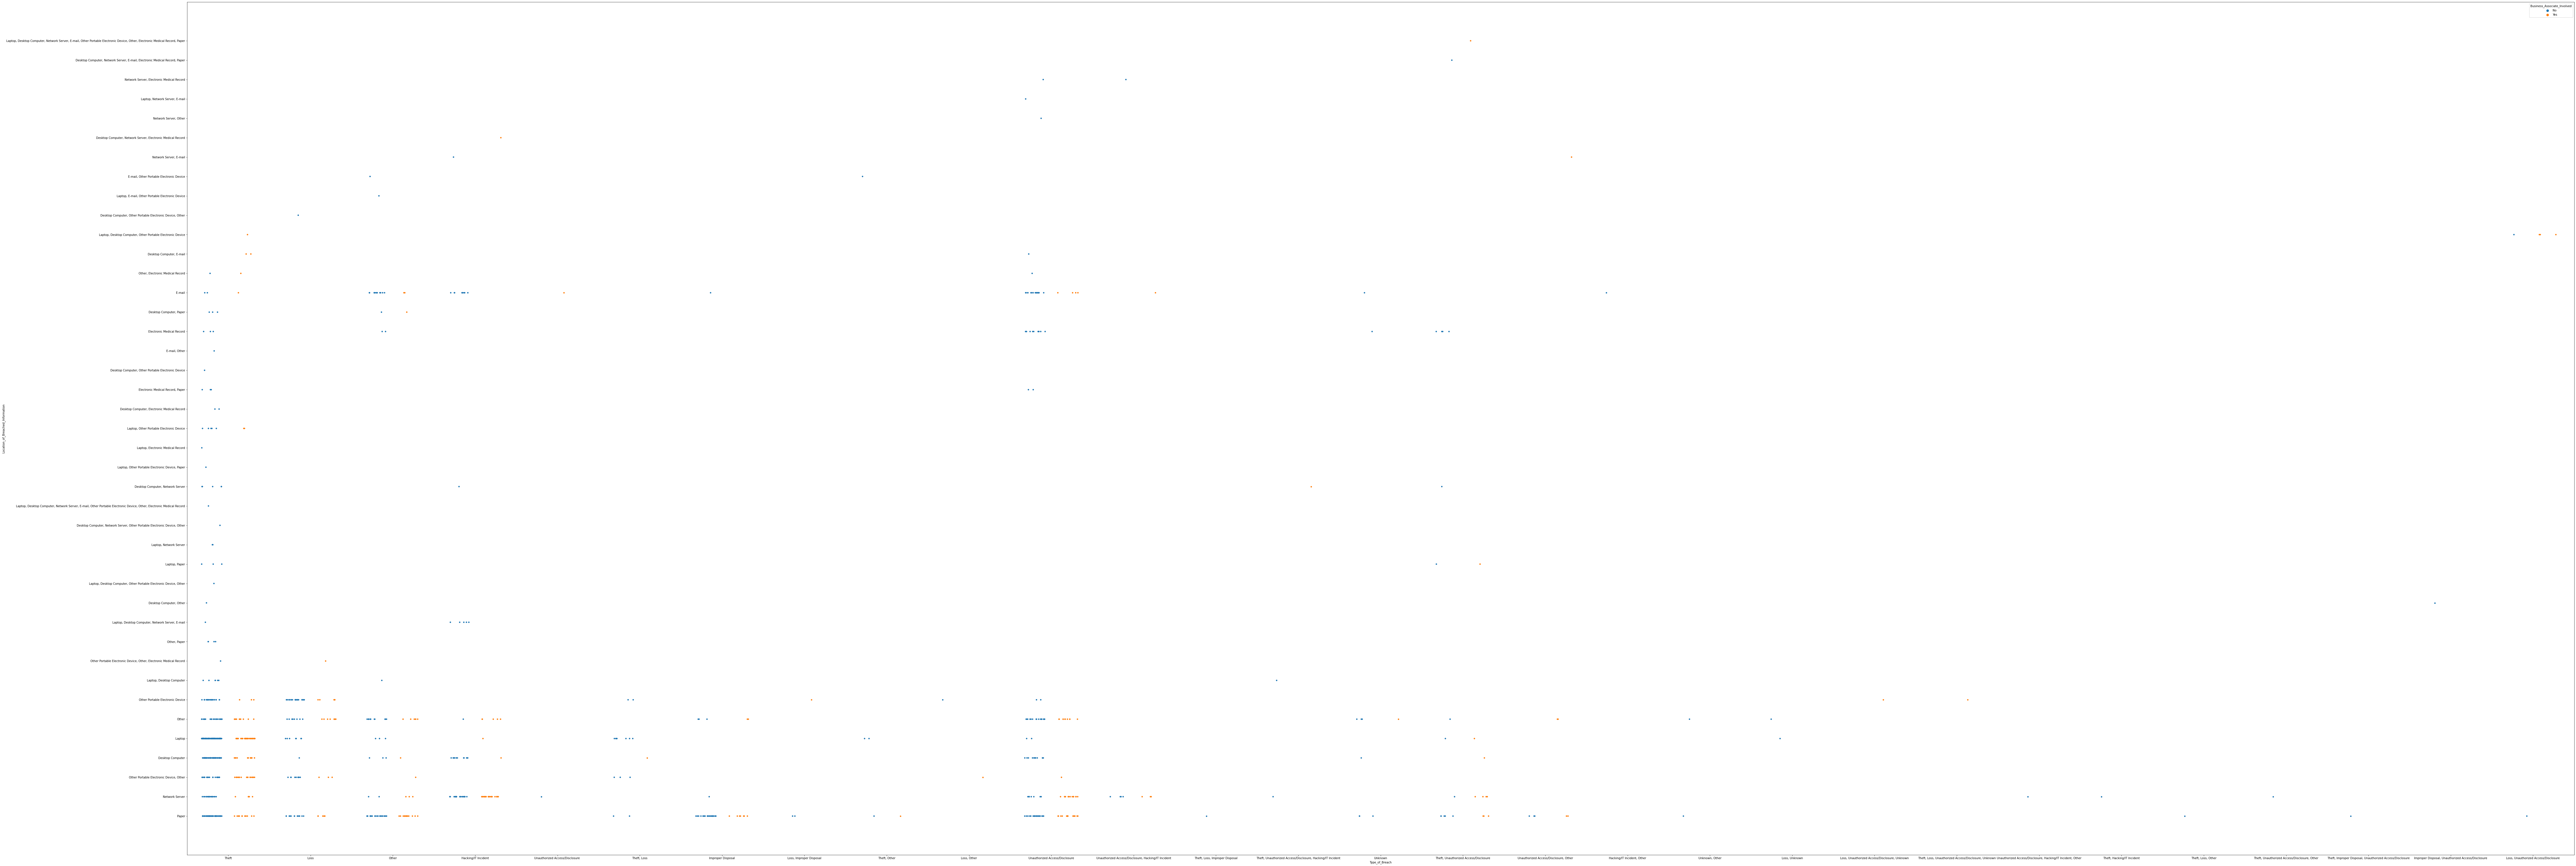

In [13]:
plt.figure(figsize=(150, 55))
sns.stripplot(x='Type_of_Breach', y='Location_of_Breached_Information', hue='Business_Associate_Involved', jitter=0.25, data=df, dodge=True)

In [ ]:
df.to_csv("Datasets/Preprocessed-Datasets/preprocessed-Cybersecurity-Dataset.csv", index=False)